- importando bibliotecas

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


- importando meu dataset

In [56]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1- Tratamento de Dados

In [57]:
print('valores nulos: ', df.isnull().sum().sum()) # checa se tem valores nulos
print('valores duplicados: ', df.duplicated().sum())

valores nulos:  149
valores duplicados:  0


In [58]:
df.info() #checando o tipo dos meus dados, e verificando onde estão os valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns
#chechando se deu certo
print('Número de colunas somadas das duas divisioes:',num_cols.shape[0] + cat_cols.shape[0]) #numero de colunas somadas dos dois dataframes
print('Número de colunas df original :',df.shape[1]) #numero de colunas do df original

Número de colunas somadas das duas divisioes: 13
Número de colunas df original : 13


In [60]:
from sklearn.pipeline import Pipeline #Pipeline
from sklearn.impute import SimpleImputer #Imputar valores faltantes
from sklearn.preprocessing import StandardScaler #Padronizar os valores

In [61]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #substituir os valores faltantes pela média
    ('scaler', StandardScaler()) #Padronizar os valores
])

In [62]:
cat_cols = np.delete(cat_cols, 0) #Removendo coluna ID
cat_cols = np.delete(cat_cols, 6) #Removendo coluna ID
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [63]:
print(num_cols)
print(cat_cols)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [64]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [65]:
cat_cols_onehot_enc = cat_cols[:4] # como as colunas possuem poucas categorias, faremos um one-hot-encoding
cat_cols_label_enc = cat_cols[4:] # como as colunas possuem muitas categorias, faremos um one-label-encoding

In [66]:
from sklearn.preprocessing import OneHotEncoder
cat_one_hot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #substituir os valores faltantes pela moda
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)), #transformar as colunas categóricas em números
    ('scaler', StandardScaler()) #Padronizar os valores
])

In [67]:
from sklearn.preprocessing import OrdinalEncoder
cat_one_label_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #substituir os valores faltantes pela moda
    ('ordinal', OrdinalEncoder()), #transformar as colunas categóricas em números
    ('scaler', StandardScaler()) #Padronizar os valores
])

In [68]:
#Reagrupando as colunas
from sklearn.compose import ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_one_label_pipeline',cat_one_label_pipeline,cat_cols_label_enc),
    ('cat_one_hot_pipeline',cat_one_hot_pipeline, cat_cols_onehot_enc)],
    remainder='drop',
    n_jobs=-1
)

In [69]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']  # Apenas a coluna Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [70]:
#Separando treino e teste
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)  # X sem 'Loan_Status' e 'Loan_ID'
y = df['Loan_Status']  # Somente 'Loan_Status' como y

([<matplotlib.patches.Wedge at 0x1c315cb4410>,
 [Text(-0.6105422225368479, 0.9150072100807547, 'Não pagou'),
  Text(0.610542084374596, -0.915007302270055, 'Pagou')],
 [Text(-0.33302303047464427, 0.4990948418622298, '68.7%'),
  Text(0.333022955113416, -0.4990948921473027, '31.3%')])

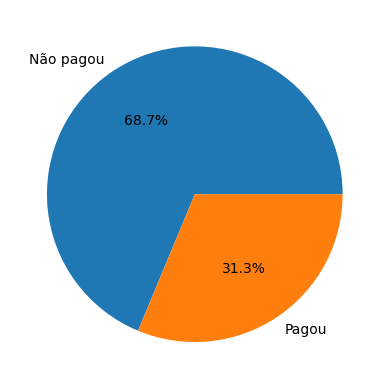

In [71]:
# checando balanceamento dos dados
plt.pie(y.value_counts(), labels = ['Não pagou', 'Pagou'], autopct='%1.1f%%')

In [72]:
#Baseline Model
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
smote = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
dtc = DecisionTreeClassifier(random_state=42, max_depth=5)
# Agora vamos adicionar o SMOTE ao pipeline
# Usando o Pipeline do imbalanced-learn
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode definir o método de balanceamento

# Criando o pipeline balanceado
pipefinal = ImbPipeline(steps=[
    ('col_transformer', col_transformer),  # Colocando o ColumnTransformer para as transformações
    ('smote', smote),  # Balanceando com SMOTE
    ('dtc', dtc)  # Modelo de árvore de decisão
])

# Treinando o pipeline balanceado
pipefinal.fit(X_train, y_train)


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat_one_label_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(stra...
                                                 ('cat_one_hot_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('dtc', DecisionTreeClassifier(max_depth=5, random_state=42))])

In [73]:
pipefinal.score(X_test, y_test)

0.7886178861788617

In [74]:
# modelo mais robusto
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=80, random_state=42,max_depth=5)
pipeline_rf = ImbPipeline(steps=[
    ('col_transformer', col_transformer),  # Pré-processamento
    ('smote', smote),  # Balanceamento de dados
    ('rf', rf)  # Modelo Random Forest
])
pipeline_rf.fit(X_train, y_train)
pipeline_rf.score(X_test, y_test)

0.8455284552845529

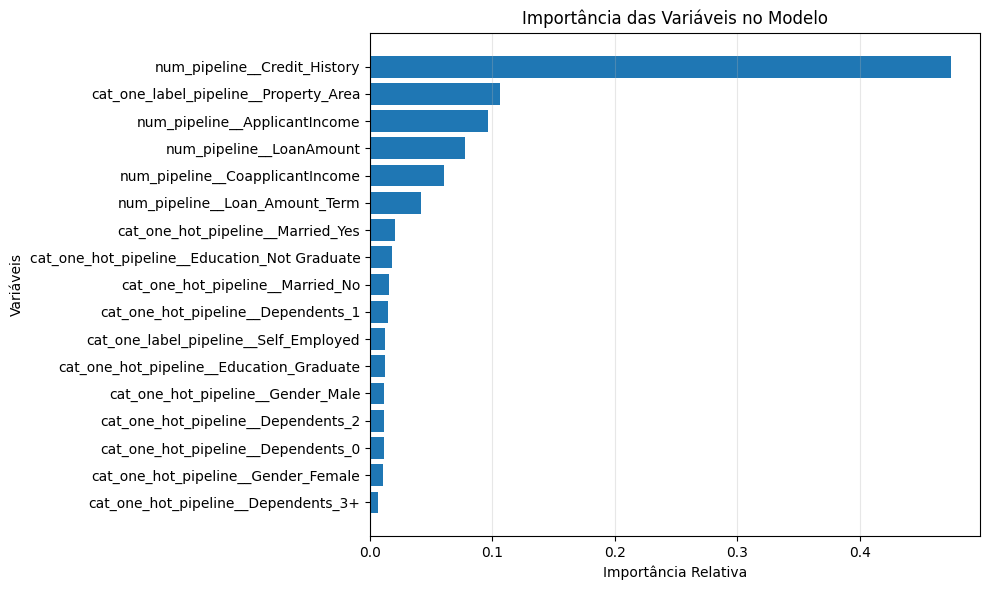

In [78]:
import matplotlib.pyplot as plt

# Extrair nomes das features e importância
preprocessor = pipeline_rf.named_steps['col_transformer']
feature_names = preprocessor.get_feature_names_out()
importances = pipeline_rf.named_steps['rf'].feature_importances_

# Criar DataFrame e ordenar
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=True)

# Plotar
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='#1f77b4')
plt.title('Importância das Variáveis no Modelo')
plt.xlabel('Importância Relativa')
plt.ylabel('Variáveis')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [76]:
# No seu script de treinamento (após treinar o pipeline_rf)
import joblib

# Salvar o modelo
joblib.dump(pipeline_rf, 'loan_model.pkl')

# Salvar as colunas esperadas pelo modelo
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']